# Project Title:  Predicting App Success On Google Playstore

# 1. Introduction to the Dataset:


# 1.1. Welcome to the world of mobile apps! The Google Play Store, like a giant market, is home to a ton of apps that cover all sorts of interests. Let's dive into the data and uncover the exciting insights it holds!

# 1.3. Importing the dependecies

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
!pip install CurrencyConverter
from currency_converter import CurrencyConverter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  RandomForestRegressor
from keras.layers import Dense,BatchNormalization,Flatten
from keras.models import Sequential
import keras
from keras.metrics import mean_absolute_error
warnings.filterwarnings('ignore')


# 2. Data Preparation and Cleaning

In [ ]:
df=pd.read_csv("Google-Playstore.csv")


In [2]:
#Print first 10 records
df.head(10)

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35
5,IMOCCI,com.imocci,Social,0.0,0.0,50+,50.0,89,True,0.0,...,http://www.imocci.com,info@imocci.com,"Dec 24, 2018","Dec 20, 2019",Teen,https://www.imocci.com/wp-content/uploads/2018...,False,True,False,2021-06-15 20:19:35
6,unlimited 4G data prank free app,getfreedata.superfatiza.unlimitedjiodataprank,Libraries & Demo,4.5,12.0,"1,000+",1000.0,2567,True,0.0,...,NaN,aitomgharfatimezzahra@gmail.com,"Sep 23, 2019","Sep 27, 2019",Everyone,https://sites.google.com/view/unlimited4gdatap...,True,False,False,2021-06-15 20:19:35
7,The Everyday Calendar,com.mozaix.simoneboard,Lifestyle,2.0,39.0,500+,500.0,702,True,0.0,...,NaN,elementuser03@gmail.com,"Jun 21, 2019","Jun 21, 2019",Everyone,https://www.freeprivacypolicy.com/privacy/view...,False,False,False,2021-06-15 20:19:35
8,WhatsOpen,com.whatsopen.app,Communication,0.0,0.0,10+,10.0,18,True,0.0,...,http://yilvermolinah.com,yilver.mh1996@gmail.com,NaN,"Dec 07, 2018",Teen,http://elcafedelamanana.yilvermolinah.com/poli...,False,False,False,2021-06-15 20:19:35
9,Neon 3d Iron Tech Keyboard Theme,com.ikeyboard.theme.neon_3d.iron.tech,Personalization,4.7,820.0,"50,000+",50000.0,62433,True,0.0,...,https://trendyteme888-31139.web.app,trendyteme.888@gmail.com,"Sep 22, 2019","Oct 07, 2020",Everyone,http://bit.ly/EmojiThemePro,True,False,False,2021-06-15 20:19:35


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 24 columns):
 #   Column             Dtype  
---  ------             -----  
 0   App Name           object 
 1   App Id             object 
 2   Category           object 
 3   Rating             float64
 4   Rating Count       float64
 5   Installs           object 
 6   Minimum Installs   float64
 7   Maximum Installs   int64  
 8   Free               bool   
 9   Price              float64
 10  Currency           object 
 11  Size               object 
 12  Minimum Android    object 
 13  Developer Id       object 
 14  Developer Website  object 
 15  Developer Email    object 
 16  Released           object 
 17  Last Updated       object 
 18  Content Rating     object 
 19  Privacy Policy     object 
 20  Ad Supported       bool   
 21  In App Purchases   bool   
 22  Editors Choice     bool   
 23  Scraped Time       object 
dtypes: bool(4), float64(4), int64(1), object(15)
memor

In [4]:
df.columns

Index(['App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size', 'Minimum Android', 'Developer Id', 'Developer Website',
       'Developer Email', 'Released', 'Last Updated', 'Content Rating',
       'Privacy Policy', 'Ad Supported', 'In App Purchases', 'Editors Choice',
       'Scraped Time'],
      dtype='object')

In [5]:
#Display the data types of each column in the dataframe
df.dtypes

App Name              object
App Id                object
Category              object
Rating               float64
Rating Count         float64
Installs              object
Minimum Installs     float64
Maximum Installs       int64
Free                    bool
Price                float64
Currency              object
Size                  object
Minimum Android       object
Developer Id          object
Developer Website     object
Developer Email       object
Released              object
Last Updated          object
Content Rating        object
Privacy Policy        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
Scraped Time          object
dtype: object

In [6]:
#Let's print first row and compare it against the header or another row that is correct.

df.iloc[0]

App Name                                        Gakondo
App Id                              com.ishakwe.gakondo
Category                                      Adventure
Rating                                              0.0
Rating Count                                        0.0
Installs                                            10+
Minimum Installs                                   10.0
Maximum Installs                                     15
Free                                               True
Price                                               0.0
Currency                                            USD
Size                                                10M
Minimum Android                              7.1 and up
Developer Id          Jean Confident Irénée NIYIZIBYOSE
Developer Website           https://beniyizibyose.tk/#/
Developer Email                  jean21101999@gmail.com
Released                                   Feb 26, 2020
Last Updated                               Feb 2

In [7]:
#Return the count of distincted values

df.nunique()

App Name             2177944
App Id               2312944
Category                  48
Rating                    42
Rating Count           38482
Installs                  22
Minimum Installs          22
Maximum Installs      251563
Free                       2
Price                   1063
Currency                  15
Size                    1657
Minimum Android          154
Developer Id          758371
Developer Website     810440
Developer Email       950456
Released                4158
Last Updated            3918
Content Rating             6
Privacy Policy        977743
Ad Supported               2
In App Purchases           2
Editors Choice             2
Scraped Time           67374
dtype: int64

In [8]:
df.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


In [9]:
#Descriptive analysis(summary statistics)

df_description = df.describe().applymap(lambda x: format(x, '.6f'))
df_description_str = df_description.to_string()
print(df_description_str)

               Rating      Rating Count    Minimum Installs    Maximum Installs           Price
count  2290061.000000    2290061.000000      2312837.000000      2312944.000000  2312944.000000
mean         2.203152       2864.838877       183445.213958       320201.713137        0.103499
std          2.106223     212162.571036     15131439.059725     23554954.886545        2.633127
min          0.000000          0.000000            0.000000            0.000000        0.000000
25%          0.000000          0.000000           50.000000           84.000000        0.000000
50%          2.900000          6.000000          500.000000          695.000000        0.000000
75%          4.300000         42.000000         5000.000000         7354.000000        0.000000
max          5.000000  138557570.000000  10000000000.000000  12057627016.000000      400.000000


In [10]:
df.shape

(2312944, 24)

# Observations

1. There are '2312944' rows and '24' columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
    - 'App Name', 'App Id', 'Category', 'Rating', 'Rating Count', 'Installs',
       'Minimum Installs', 'Maximum Installs', 'Free', 'Price', 'Currency',
       'Size, 'Minimum Android', `Developer Id`, `Developer Website`,
       `Developer Email`, `Released`, `Last Updated`, `Content Rating`,
       `Privacy Policy`, `Ad Supported`, `In App Purchases`, `Editors Choice`,
       `Scraped Time`
4. dtypes: bool = 4, float64 = 4, int64 = 1, object = 15
5. There are some missing values in the dataset which we will read in details and deal later on in the notebook.  
    - `Developer Website` have almost 33% and `Privacy Policy` have almost 18% of missing values 
6. Few columns need remove as they do not contribute to the overall results of the dataset
    - like: `App Id`, `Developer Id`, `Developer Website`, `Developer Email`, `Privacy Policy`, `Editors Choice`, `Minimum Android` & `Scraped Time`
7. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
    - `Installs` & `Size`

# 2.1 Drop the columns that are not important

In [32]:
# Drop unnecessary columns from the DataFrame
df = df.drop(['App Id', 'Developer Id', 'Developer Website', 'Developer Email', 'Privacy Policy', 'Editors Choice', 'Minimum Android', 'Scraped Time'], axis='columns')

In [33]:
# Rename columns by converting them to lowercase, removing leading/trailing whitespaces, and replacing spaces with underscores
df.rename(lambda x: x.lower().strip().replace(' ', '_'), axis='columns', inplace=True)

In [34]:
# Display the first five rows of the DataFrame
df.head()

,app_name,category,rating,rating_count,installs,minimum_installs,maximum_installs,free,price,currency,size,released,last_updated,content_rating,ad_supported,in_app_purchases
0,Gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,USD,10M,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False
1,Ampere Battery Info,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,USD,2.9M,"May 21, 2020","May 06, 2021",Everyone,True,False
2,Vibook,Productivity,0.0,0.0,50+,50.0,58,True,0.0,USD,3.7M,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10+,10.0,19,True,0.0,USD,1.8M,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False
4,GROW.me,Tools,0.0,0.0,100+,100.0,478,True,0.0,USD,6.2M,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False


# 2.2 Tackle Null/Missing values

In [35]:
df.isnull().sum()

app_name                2
category                0
rating              22883
rating_count        22883
installs              107
minimum_installs      107
maximum_installs        0
free                    0
price                   0
currency              135
size                  196
released            71053
last_updated            0
content_rating          0
ad_supported            0
in_app_purchases        0
dtype: int64

In [36]:
# Select and display only the columns where the count of missing values is greater than 0
df.isnull().sum()[df.isnull().sum()>0]

app_name                2
rating              22883
rating_count        22883
installs              107
minimum_installs      107
currency              135
size                  196
released            71053
dtype: int64

In [42]:
# Drop rows with missing values in specified columns ('app_name', 'installs', 'minimum_installs', 'currency')
# The inplace=True parameter modifies the DataFrame in place
df.dropna(subset=['app_name', 'installs', 'minimum_installs','size' ,'currency'], inplace=True)

In [43]:
# Select and display only the columns where the count of missing values is greater than 0
df.isnull().sum()[df.isnull().sum()>0]

rating          22573
rating_count    22573
released        70756
dtype: int64

In [45]:
df.duplicated().sum()

6

In [46]:
# Drop duplicate rows in the DataFrame, keeping only the first occurrence of each set of duplicated rows
df.drop_duplicates(inplace=True)

In [47]:
df.duplicated().sum()

0

In [50]:
df['rating'].describe()

count    2.290033e+06
mean     2.203152e+00
std      2.106223e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.900000e+00
75%      4.300000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [51]:
# Calculate the average rating in each 'Category'
df.groupby('category')['rating'].mean()

category
Action                     2.706039
Adventure                  2.814991
Arcade                     2.450446
Art & Design               1.952354
Auto & Vehicles            2.049613
Beauty                     1.434105
Board                      2.782275
Books & Reference          2.467159
Business                   1.439067
Card                       3.085160
Casino                     3.279682
Casual                     2.425209
Comics                     2.864906
Communication              2.122550
Dating                     2.451605
Education                  2.246859
Educational                2.437742
Entertainment              2.435374
Events                     1.270809
Finance                    2.403102
Food & Drink               1.294581
Health & Fitness           1.623796
House & Home               1.485381
Libraries & Demo           2.087115
Lifestyle                  1.930373
Maps & Navigation          2.224889
Medical                    1.848003
Music              

In [52]:
# Calculate the average rating in each 'Category'
average_ratings = df.groupby('category')['rating'].transform('mean')

# Replace missing values in 'Rating' with the respective average ratings of their Category
df['rating'] = df['rating'].fillna(average_ratings)

In [53]:
# Calculate the average rating in each 'Category'
average_rating_count = df.groupby('category')['rating_count'].transform('mean')

# Replace missing values in 'Rating' with the respective average ratings of their Category
df['rating_count'] = df['rating_count'].fillna(average_rating_count)

In [58]:
df = df.dropna(subset=['released'])

In [60]:
df['released']

0          Feb 26, 2020
1          May 21, 2020
2           Aug 9, 2019
3          Sep 10, 2018
4          Feb 21, 2020
               ...     
2312938    May 22, 2018
2312940    Jan 17, 2018
2312941    Aug 19, 2018
2312942     Aug 1, 2016
2312943     Aug 9, 2019
Name: released, Length: 2241850, dtype: object

In [62]:
df['installs'].unique()

array(['10+', '5,000+', '50+', '100+', '1,000+', '500+', '50,000+',
       '10,000+', '1+', '500,000+', '100,000+', '5+', '10,000,000+',
       '1,000,000+', '5,000,000+', '0+', '100,000,000+', '50,000,000+',
       '1,000,000,000+', '500,000,000+', '5,000,000,000+',
       '10,000,000,000+'], dtype=object)

In [66]:
df['installs'] = df['installs'].str.split('+').str[0]  # Remove the + symbol
df['installs'].replace(',','', regex=True, inplace=True)   # Remove the + symbol

In [67]:
df['installs'] = df['installs'].replace (to_replace=[np.nan,""], value=0).astype('int64')   # Converting it to the int type

In [68]:
df['installs'].unique()

array([         10,        5000,          50,         100,        1000,
               500,       50000,       10000,           1,      500000,
            100000,           5,    10000000,     1000000,     5000000,
                 0,   100000000,    50000000,  1000000000,   500000000,
        5000000000, 10000000000], dtype=int64)

In [70]:
df['currency'].unique()

array(['USD', 'XXX', 'CAD', 'EUR', 'INR', 'VND', 'GBP', 'BRL', 'KRW',
       'TRY', 'SGD', 'AUD', 'ZAR'], dtype=object)

In [72]:
df['size'].unique()

array(['10M', '2.9M', '3.7M', ..., '405M', '3.2k', '512M'], dtype=object)

#  3. The Size of data can be in GB,MB and KB we will convert the data into the size in MB

In [73]:
df['size'] = df['size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)

In [102]:
#df['size'] = df['size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

In [76]:
df['size'] = df['size'].apply(lambda x: str(x).replace(',', '.') if ',' in str(x) else x)

# 3.1 Convert kbs to mb

In [77]:
df['size'] = df['size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

# 3.2 Convert GBs to MBs

In [78]:
df['size'] = df['size'].apply(lambda x: float(str(x).replace('G', '')) * 1000 if 'G' in str(x) else x)

In [79]:
df.dtypes['size']

dtype('O')

In [84]:
df['last_updated']

0          Feb 26, 2020
1          May 06, 2021
2          Aug 19, 2019
3          Oct 13, 2018
4          Nov 12, 2018
               ...     
2312938    Dec 14, 2018
2312940    Feb 02, 2018
2312941    Aug 19, 2018
2312942    May 05, 2021
2312943    Aug 19, 2019
Name: last_updated, Length: 2241850, dtype: object

In [85]:
df['released']

0          Feb 26, 2020
1          May 21, 2020
2           Aug 9, 2019
3          Sep 10, 2018
4          Feb 21, 2020
               ...     
2312938    May 22, 2018
2312940    Jan 17, 2018
2312941    Aug 19, 2018
2312942     Aug 1, 2016
2312943     Aug 9, 2019
Name: released, Length: 2241850, dtype: object

In [87]:
df['free']

0          True
1          True
2          True
3          True
4          True
           ... 
2312938    True
2312940    True
2312941    True
2312942    True
2312943    True
Name: free, Length: 2241850, dtype: bool

In [89]:
# lets clean the Content rating column
df['content_rating'].unique()

array(['Everyone', 'Teen', 'Mature 17+', 'Everyone 10+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [90]:
df['content_rating'].value_counts()

Everyone           1959896
Teen                190169
Mature 17+           58676
Everyone 10+         32827
Unrated                152
Adults only 18+        130
Name: content_rating, dtype: int64

# Observations :

1. We have varies Categories in the Content Rating Columns:
   - Everyone
   - Teen
   - Mature 17+
   - Everyone
   - Unrated
   - Adults only 18+

Now, we makes this Categories to a simple 3 Categories for better Understanding:
Everyone, teen, Adults
  - Mature 17+ ---> to Adults
  - Everyone 10+ ---> to TEEN
  - Unrated ---> to Everyone
  - Adults only 18+ ---> to Adults
  

In [91]:
df["content_rating"] = df["content_rating"].replace("Unrated", "Everyone")
df["content_rating"] = df["content_rating"].replace("Everyone 10+", "Teen")
df["content_rating"] = df["content_rating"].replace("Mature 17+", "Adults")
df["content_rating"] = df["content_rating"].replace("Adults only 18+", "Adults")

In [92]:
df['content_rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

In [93]:
# Creataing the column type for free and paid Apps by using the Free column, it's helpfull while dealing with the paid and Free Apps
df['type'] = np.where(df['free'] == True,'Free','Paid')
df.drop(['free'],axis=1, inplace= True )

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241850 entries, 0 to 2312943
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   app_name          object 
 1   category          object 
 2   rating            float64
 3   rating_count      float64
 4   installs          int64  
 5   minimum_installs  float64
 6   maximum_installs  int64  
 7   price             float64
 8   currency          object 
 9   size              object 
 10  released          object 
 11  last_updated      object 
 12  content_rating    object 
 13  ad_supported      bool   
 14  in_app_purchases  bool   
 15  type              object 
dtypes: bool(2), float64(4), int64(2), object(8)
memory usage: 260.8+ MB


In [95]:
df['rating'].unique()

array([0.        , 4.4       , 5.        , 4.5       , 2.        ,
       4.7       , 4.9       , 3.9       , 3.7       , 4.2       ,
       3.4       , 3.8       , 4.6       , 4.1       , 2.5       ,
       2.3       , 2.1       , 2.7       , 4.3       , 3.1       ,
       4.8       , 3.3       , 4.        , 2.4       , 3.2       ,
       3.6       , 2.6       , 1.5       , 3.5       , 2.9       ,
       1.3       , 2.8       , 3.        , 2.2       , 1.8       ,
       1.4       , 1.2       , 1.9       , 1.7       , 1.6       ,
       1.        , 1.1       , 2.70603914, 1.43906675, 1.83699884,
       2.34607631, 2.24685881, 2.42520911, 2.48373491, 2.12254964,
       2.43537412, 2.4671594 , 2.04961283, 2.43774158, 2.52617846,
       1.27080868, 2.51976488, 2.39886704, 1.93795228, 2.40310212,
       1.48538065, 1.62379626, 2.87890008, 1.29458083, 2.96038514,
       1.93037313, 1.84800252, 2.31553846, 2.22488899, 3.21088717,
       2.814991  , 2.4516054 , 2.45044587, 2.68833254, 2.22682

In [96]:
df['rating_count'].max()

138557570.0

In [99]:
df['rating_type'] = 'NoRatingProvided'
df.loc[(df['rating_count'] > 0) & (df['rating_count'] <=10000.0), 'rating_type'] = 'Less than 10k'
df.loc[(df['rating_count'] > 10000) & (df['rating_count'] <=500000.0), 'rating_type'] = 'Between 10k and 500k'
df.loc[(df['rating_count'] > 500000) & (df['rating_count'] <=138557570.0), 'rating_type'] = 'More than 500k'
df['rating_type'].value_counts()

Less than 10k           1167482
NoRatingProvided        1038313
Between 10k and 500k      34465
More than 500k             1590
Name: rating_type, dtype: int64

In [100]:
df['rating_type']

0          NoRatingProvided
1             Less than 10k
2          NoRatingProvided
3             Less than 10k
4          NoRatingProvided
                 ...       
2312938       Less than 10k
2312940    NoRatingProvided
2312941    NoRatingProvided
2312942       Less than 10k
2312943       Less than 10k
Name: rating_type, Length: 2241850, dtype: object

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241850 entries, 0 to 2312943
Data columns (total 18 columns):
 #   Column            Dtype  
---  ------            -----  
 0   app_name          object 
 1   category          object 
 2   rating            float64
 3   rating_count      float64
 4   installs          int64  
 5   minimum_installs  float64
 6   maximum_installs  int64  
 7   price             float64
 8   currency          object 
 9   size              object 
 10  released          object 
 11  last_updated      object 
 12  content_rating    object 
 13  ad_supported      bool   
 14  in_app_purchases  bool   
 15  type              object 
 16  rating_type       object 
 17  Rating type       object 
dtypes: bool(2), float64(4), int64(2), object(10)
memory usage: 295.0+ MB


In [111]:
df.head()

,app_name,category,rating,rating_count,installs,minimum_installs,maximum_installs,price,currency,size,released,last_updated,content_rating,ad_supported,in_app_purchases,type,rating_type
0,Gakondo,Adventure,0.0,0.0,10,10.0,15,0.0,USD,10,"Feb 26, 2020","Feb 26, 2020",Everyone,False,False,Free,NoRatingProvided
1,Ampere Battery Info,Tools,4.4,64.0,5000,5000.0,7662,0.0,USD,2.9,"May 21, 2020","May 06, 2021",Everyone,True,False,Free,Less than 10k
2,Vibook,Productivity,0.0,0.0,50,50.0,58,0.0,USD,3.7,"Aug 9, 2019","Aug 19, 2019",Everyone,False,False,Free,NoRatingProvided
3,Smart City Trichy Public Service Vehicles 17UC...,Communication,5.0,5.0,10,10.0,19,0.0,USD,1.8,"Sep 10, 2018","Oct 13, 2018",Everyone,True,False,Free,Less than 10k
4,GROW.me,Tools,0.0,0.0,100,100.0,478,0.0,USD,6.2,"Feb 21, 2020","Nov 12, 2018",Everyone,False,False,Free,NoRatingProvided


In [110]:
df.drop(columns=['Rating type'], inplace=True)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241850 entries, 0 to 2312943
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   app_name          object 
 1   category          object 
 2   rating            float64
 3   rating_count      float64
 4   installs          int64  
 5   minimum_installs  float64
 6   maximum_installs  int64  
 7   price             float64
 8   currency          object 
 9   size              object 
 10  released          object 
 11  last_updated      object 
 12  content_rating    object 
 13  ad_supported      bool   
 14  in_app_purchases  bool   
 15  type              object 
 16  rating_type       object 
dtypes: bool(2), float64(4), int64(2), object(9)
memory usage: 277.9+ MB


# 4. Calculate the correlation coefficients between numerical columns

In [113]:
numeric_columns = df.select_dtypes(include='number')
correlation = numeric_columns.corr()
correlation

,rating,rating_count,installs,minimum_installs,maximum_installs,price
rating,1.000000,0.013623,0.011597,0.011597,0.013073,-0.003790
rating_count,0.013623,1.000000,0.527729,0.527729,0.540637,-0.000419
installs,0.011597,0.527729,1.000000,1.000000,0.947887,-0.000474
minimum_installs,0.011597,0.527729,1.000000,1.000000,0.947887,-0.000474
maximum_installs,0.013073,0.540637,0.947887,0.947887,1.000000,-0.000532
price,-0.003790,-0.000419,-0.000474,-0.000474,-0.000532,1.000000


# 4.1 Represent the relationships between different numerical variables using heatmap.

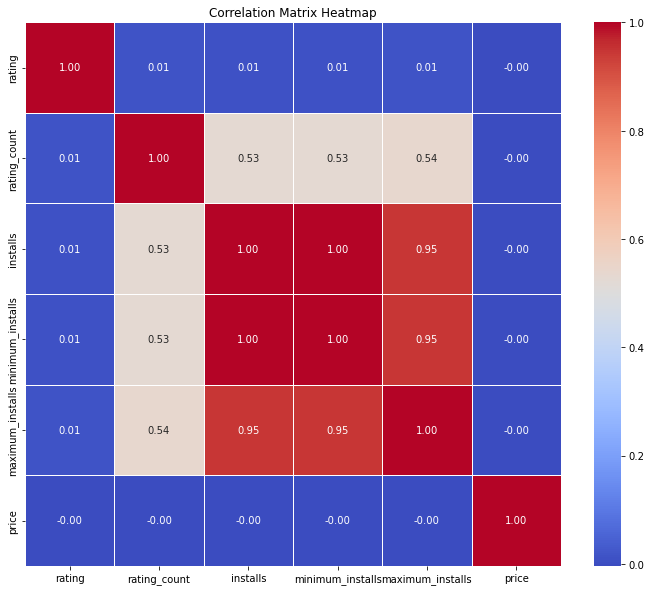

In [116]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f",linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# 4.2 Boxplot to understand the distribution and variability of numerical data.

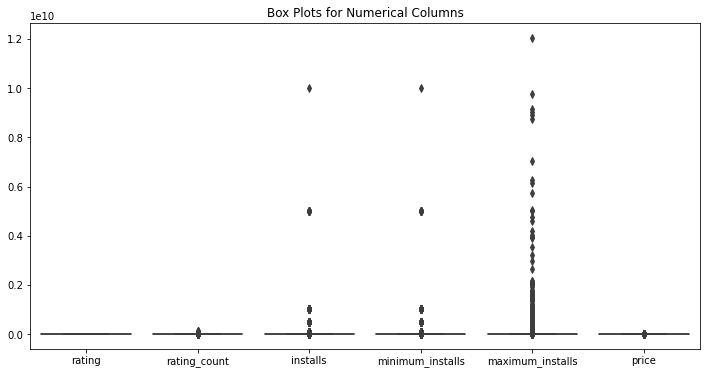

In [117]:
# filter out only the numerical columns.
numerical_columns = df.select_dtypes(include='number').columns
# Create box plots for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plots for Numerical Columns')
plt.show()


# 5. Question and Answers:
 - What are the top 10 Categories that are installed from the Google Play Store?
 - Which are the Categories that are getting installed the most in the top Categories?
 - which is the highest rated categories?
 - How does the size of the application impacts the installation?
 - What are the top 5 paid Apps based with highest ratings and installs?

In [119]:
df['category'].unique()

array(['Adventure', 'Tools', 'Productivity', 'Communication', 'Social',
       'Libraries & Demo', 'Lifestyle', 'Personalization', 'Racing',
       'Maps & Navigation', 'Travel & Local', 'Food & Drink',
       'Books & Reference', 'Medical', 'Puzzle', 'Entertainment',
       'Arcade', 'Auto & Vehicles', 'Photography', 'Health & Fitness',
       'Education', 'Shopping', 'Board', 'Music & Audio', 'Sports',
       'Beauty', 'Business', 'Educational', 'Finance', 'News & Magazines',
       'Casual', 'Art & Design', 'House & Home', 'Card', 'Events',
       'Trivia', 'Weather', 'Strategy', 'Word', 'Video Players & Editors',
       'Action', 'Simulation', 'Music', 'Dating', 'Role Playing',
       'Casino', 'Comics', 'Parenting'], dtype=object)

In [120]:
top_category = df.category.value_counts().reset_index().rename(columns={'category':'Count','index':'category'})

In [121]:
top_category

,category,Count
0,Education,236112
1,Music & Audio,153451
2,Tools,138333
3,Business,136547
4,Entertainment,135485
5,Books & Reference,115537
6,Lifestyle,115338
7,Personalization,88860
8,Health & Fitness,80722
9,Productivity,75274


In [122]:
category_installs = df.groupby(['category'])[['installs']].sum()

In [123]:
category_installs

,installs
category,
Action,17184431398
Adventure,5348983339
Arcade,14314350062
Art & Design,1112587661
Auto & Vehicles,1553117018
Beauty,399478934
Board,3272120484
Books & Reference,4395200659
Business,4952909105


In [124]:
top_category_installs = pd.merge(top_category, category_installs, on='category')
top_category_installs.head(10)

,category,Count,installs
0,Education,236112,5900426105
1,Music & Audio,153451,12870366376
2,Tools,138333,63897745228
3,Business,136547,4952909105
4,Entertainment,135485,15687132768
5,Books & Reference,115537,4395200659
6,Lifestyle,115338,5707170180
7,Personalization,88860,9139626462
8,Health & Fitness,80722,4509516743
9,Productivity,75274,27787895697


In [125]:
top_10_categories_installs = top_category_installs.head(10).sort_values(by = ['installs'], ascending= False)

<AxesSubplot:title={'center':'Top 10 installed categories'}, xlabel='category', ylabel='installs'>

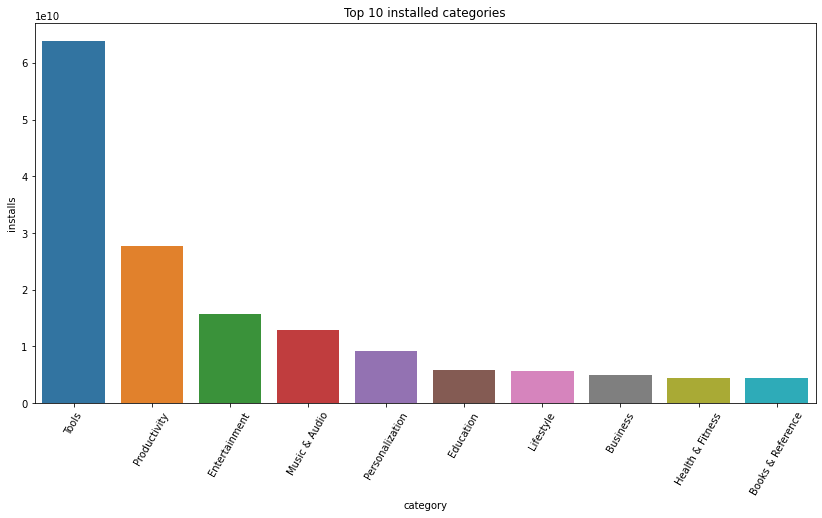

In [126]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=60)
plt.xlabel("category")
plt.ylabel("Number of applications")
plt.title("Top 10 installed categories")
sns.barplot(x= top_10_categories_installs.category, y = top_10_categories_installs.installs)

# What are the 10 Categories in playstore as per the count?

<AxesSubplot:title={'center':'top 10 categories'}, xlabel='category', ylabel='Count'>

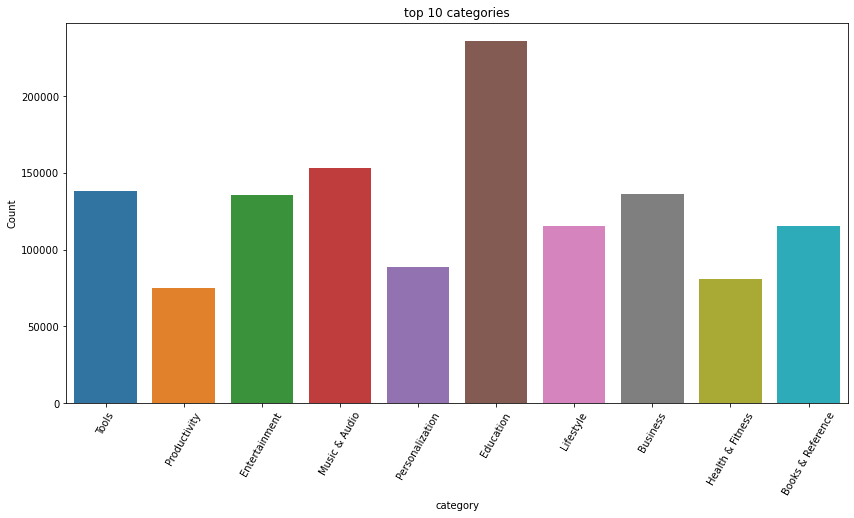

In [127]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=60)
plt.xlabel("category")
plt.ylabel("Number of applications")
plt.title("top 10 categories")
sns.barplot(x = top_10_categories_installs.category, y = top_10_categories_installs.Count)

# Visulize total Categories and the Count of Apps in each Catgory

<AxesSubplot:title={'center':'Total categories and count of Applications in each category'}, xlabel='category', ylabel='Count'>

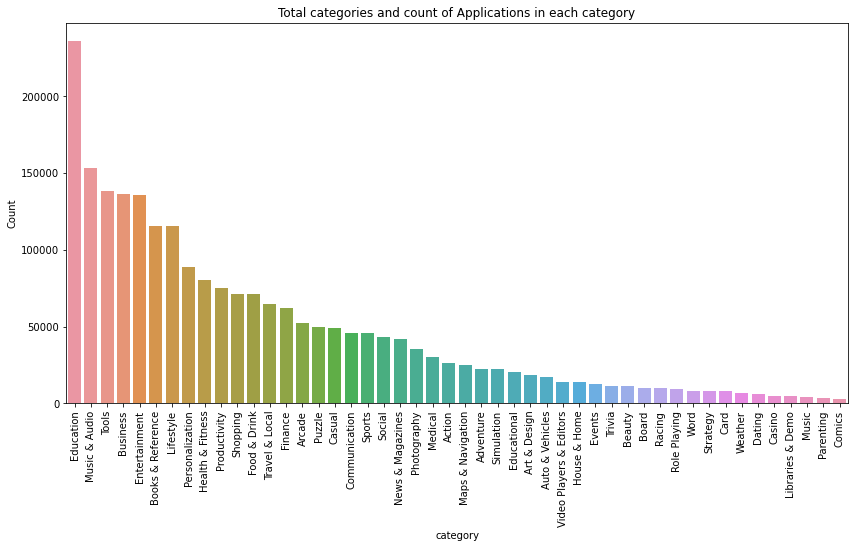

In [128]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("category_installs")
plt.ylabel("Number of applications")
plt.title("Total categories and count of Applications in each category")
sns.barplot(x = top_category_installs.category, y =top_category_installs.Count)

# Visualize Total Categories and installed Applications in each category

<AxesSubplot:title={'center':'Total categories and Installation of Applications in each category'}, xlabel='category', ylabel='installs'>

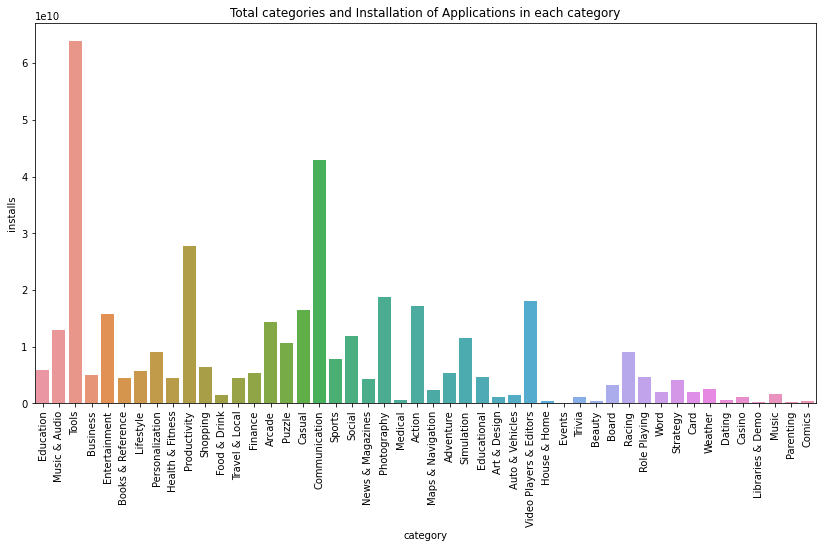

In [129]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("category")
plt.ylabel("Number of applications")
plt.title("Total categories and Installation of Applications in each category")
sns.barplot(x = top_category_installs.category, y =top_category_installs.installs)

# Rating Distribution 

Text(0.5, 1.0, 'Distribution of rating')

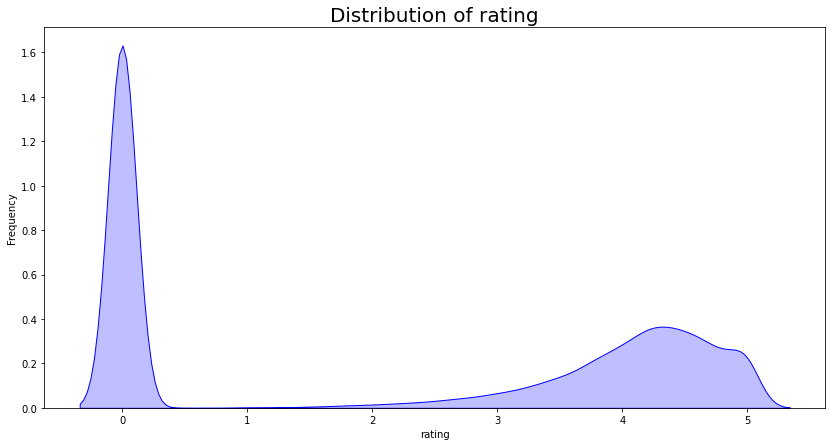

In [131]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(df.rating, color="Blue", shade= True)
g.set_xlabel("rating")
g.set_ylabel("Frequency")
plt.title('Distribution of rating', size = 20)

<AxesSubplot:title={'center':'rating'}, xlabel='rating', ylabel='Count'>

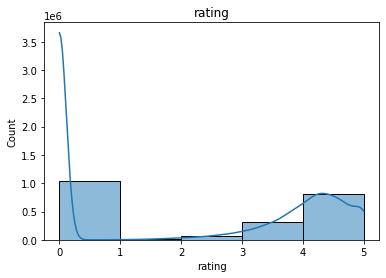

In [132]:
plt.title("rating")
sns.histplot(df.rating, kde=True,bins=5)

# Observation
From the above two plots we can see that most people does not give a rating, but one more thing that comes out from this graph as well is that people tend to give 4+ rating the most

# Q. What is highest rated category?

<AxesSubplot:title={'center':'All Categories Rating '}, xlabel='category', ylabel='rating'>

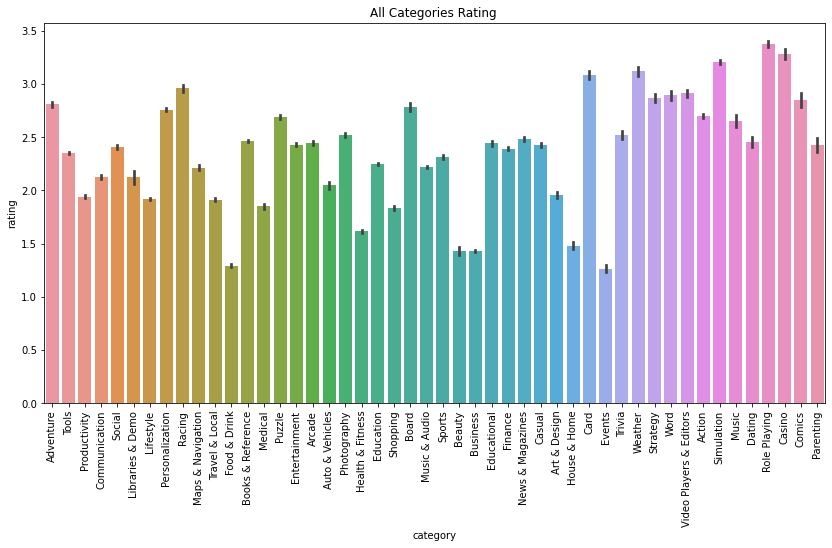

In [133]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Higest Rated Category")
plt.ylabel("Number of applications")
plt.title("All Categories Rating ")
sns.barplot(x = df.category, y = df.rating)

# Ans- From the above plot we can see that Role Playing is the Highest Rated Category

In [135]:
df['content_rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

<AxesSubplot:title={'center':'Content Rating and Maximum installations '}, xlabel='maximum_installs', ylabel='rating_count'>

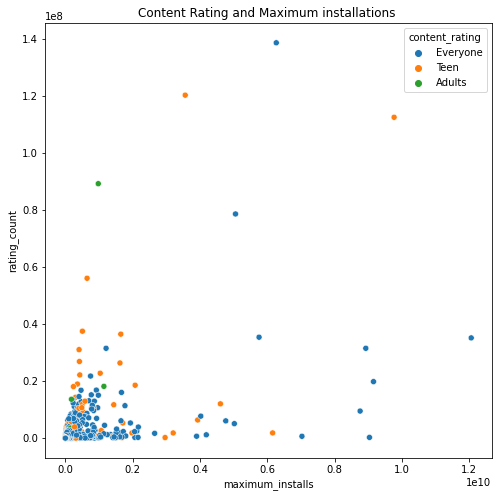

In [136]:
plt.figure(figsize=(8,8))
plt.title("Content Rating and Maximum installations ")
sns.scatterplot(x = 'maximum_installs', y ='rating_count',data=df, hue='content_rating')

# Observation

 This scatter plot shows us that : if we exclude everyone from the plot and when focus on teen and Adults we can see that teens have much engagement in terms of downloads and rating Count.

In [137]:
# Visulize the installation Types in each category

df['installs'].min(),df['installs'].max()

(0, 10000000000)

there is high variance in the number of installs, we need to reduce it so we can use a log value for this column,otherwise it would be unable to see the data when we visulize

In [138]:
category_type_installs = df.groupby(['category'])[['installs']].sum().reset_index()
category_type_installs['log_installs'] = np.log10(category_type_installs['installs'])

<AxesSubplot:title={'center':'Number of installed Apps type wise according to Category'}, xlabel='category', ylabel='log_installs'>

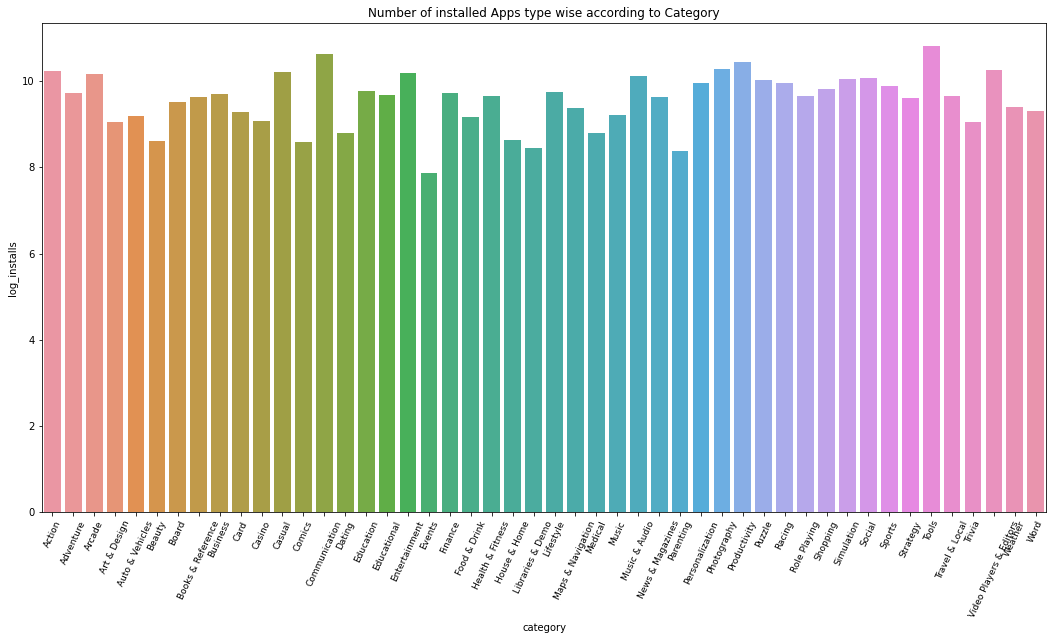

In [139]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=65, fontsize=9)
plt.xlabel("category")
plt.ylabel("installs")
plt.title("Number of installed Apps type wise according to Category")
sns.barplot(x= 'category', y = 'log_installs',  data=category_type_installs)

# Ans - from the above plot we can see that size impacts the number of installations. Applications with lager size are less installed by the end user.

In [140]:
df.corr()

,rating,rating_count,installs,minimum_installs,maximum_installs,price,ad_supported,in_app_purchases
rating,1.000000,0.013623,0.011597,0.011597,0.013073,-0.003790,0.160564,0.154579
rating_count,0.013623,1.000000,0.527729,0.527729,0.540637,-0.000419,0.005243,0.026428
installs,0.011597,0.527729,1.000000,1.000000,0.947887,-0.000474,0.002112,0.014857
minimum_installs,0.011597,0.527729,1.000000,1.000000,0.947887,-0.000474,0.002112,0.014857
maximum_installs,0.013073,0.540637,0.947887,0.947887,1.000000,-0.000532,0.002755,0.016942
price,-0.003790,-0.000419,-0.000474,-0.000474,-0.000532,1.000000,-0.035049,-0.002762
ad_supported,0.160564,0.005243,0.002112,0.002112,0.002755,-0.035049,1.000000,0.135435
in_app_purchases,0.154579,0.026428,0.014857,0.014857,0.016942,-0.002762,0.135435,1.000000


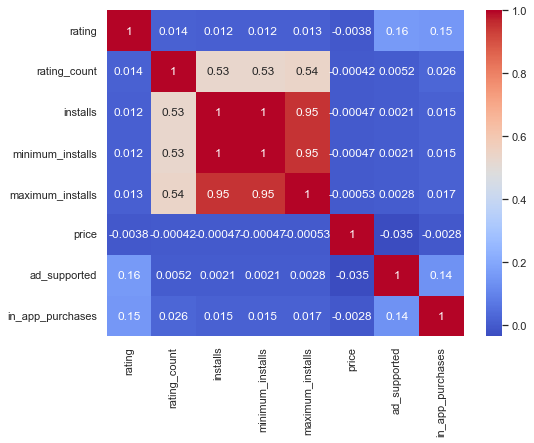

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cbar=True, cmap='coolwarm')
plt.show()


# Q - what are the Top 5 Free Apps based with highest rating and Installs?

In [144]:
free_apps = df[(df.type=='Free') & (df.installs >= 5000000)]
free_apps = free_apps.groupby('app_name')['rating'].max().sort_values(ascending= False)
free_apps = free_apps.head(5)

<AxesSubplot:title={'center':'Top 5 Free Rated Apps'}, xlabel='rating', ylabel='app_name'>

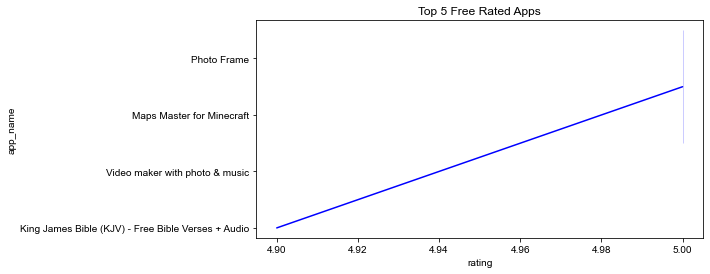

In [145]:
plt.figure(figsize=(8,4))
plt.xlabel("rating")
sns.set_theme(style="whitegrid")
plt.title("Top 5 Free Rated Apps")
sns.lineplot(x= free_apps.values, y =free_apps.index,color='Blue')

# Ans - Photo Frame, Video maker with photo & music, kuku FM - Love stories, Audio Books & Podcasts, Plank Workout a Home.

# Now, Visulize the categories that have the top 10 Max Installations

Text(0.5, 1.0, 'Top 10 Max installations Category wise')

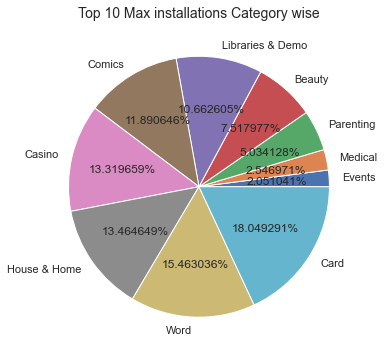

In [146]:
plt.figure(figsize=(8,6))
data = df.groupby('category')['maximum_installs'].max().sort_values(ascending = True)
data = data.head(10)
labels = data.keys()
plt.pie(data, labels= labels, autopct='%0f%%')
plt.title("Top 10 Max installations Category wise", fontsize=14)

# Visulize the top 10 installation categories that adults have installed the most

In [148]:
df['content_rating'].unique()

array(['Everyone', 'Teen', 'Adults'], dtype=object)

Text(0.5, 1.0, 'Adults Installing apps in terms of category')

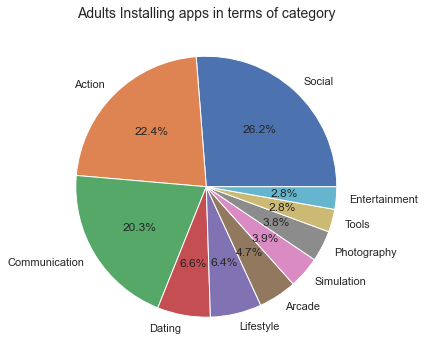

In [149]:
plt.figure(figsize=(8,6))
Adult = df[(df['content_rating']=='Adults')]
Adult = Adult.groupby(['category'])['maximum_installs'].max().sort_values(ascending=False)
Adult = Adult.head(10)
labels = Adult.keys()
plt.pie(x = Adult, autopct="%.1f%%", labels=labels)
plt.title("Adults Installing apps in terms of category", fontsize=14)

# Observation :

- Most of the Adults showing interest in download the social, Action and Communication Category

# Visulize Teens Installing the apps in terms of Category

Text(0.5, 1.0, 'Teen Installing apps in terms of category')

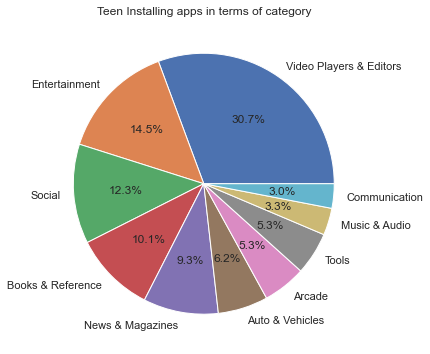

In [151]:
plt.figure(figsize=(8,6))
Teen = df[(df['content_rating']=='Teen')]
Teen = Teen.groupby(['category'])['maximum_installs'].max().sort_values(ascending=False)
Teen = Teen.head(10)
labels = Teen.keys()
plt.pie(x= Teen, autopct="%.1f%%", labels=labels)
plt.title("Teen Installing apps in terms of category")

# Summary and Conclusion:

- People are more interested to install the gamming Apps, the top Rating is given to the gaming apps.
- InAppPurchase are correlated to App Rating. So we can say that if app provides customers support and have subscription plans it will helps to engage customers.
- Most of the Adults installed the social and communication Apps.
- Most of the installation are done by teen and the most are vidio players and editors. Video players and editors are most in demand.
- Size of application varies the installation.
- People aare mostly downloaded the free apps 
- The installation of free apps is High
- The availability of the free apps is very high.

In [156]:
# Step 1: Sort the DataFrame 'df' by 'rating_count' in descending order
# Step 2: Select the top 10 rows from the sorted DataFrame
# Step 3: Select only the columns 'app_name', 'rating', and 'category' for the top-rated apps
top_rated_apps = df.sort_values(by='rating_count', ascending=False).head(10)[['app_name', 'rating', 'category']]

# Step 4: Print a message indicating that the following apps are the top 10 rated
print("Top 10 Rated Apps:")

# Step 5: Display the DataFrame containing the top-rated apps
top_rated_apps

Top 10 Rated Apps:


,app_name,rating,category
385470,WhatsApp Messenger,4.0,Communication
304824,Instagram,3.8,Social
881403,YouTube,4.4,Video Players & Editors
244319,Garena Free Fire - Rampage,4.2,Action
2095852,Messenger – Text and Video Chat for Free,4.0,Communication
423997,Clash of Clans,4.5,Strategy
58082,PUBG MOBILE - Traverse,4.3,Action
65037,TikTok,4.4,Social
1830962,Google Photos,4.5,Photography
2155096,Google Play services,4.2,Tools


# Q. Which is the percentage of Paid and Free apps?

In [2]:
# Step 1: Set the size of the figure
plt.figure(figsize=(8, 8))

# Step 2: Calculate the count of each category in the 'free' column
count = df['type'].value_counts()

# Step 3: Create a pie chart using the count, explode the 'Free' slice (to emphasize it), 
# set labels, autopct for percentage display, shadow for 3D effect, and startangle for rotation
plt.pie(count, explode=(0.25,0), labels=['free', 'Paid'], autopct='%1.1f%%', shadow=True, startangle=135)

# Step 4: Set the title of the pie chart
plt.title('Percent of Free Vs Paid Apps in store', size = 16)

# Step 5: Show the plot
plt.show()

NameError: name 'plt' is not defined

# Observation

- 2% of Apps are Paid
- 98% of Apps are Free
